In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [3]:
data = pd.read_csv('BTC-USD.csv', date_parser = True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,1.236410e+07
1,2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,1.334010e+07
2,2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,1.452960e+07
3,2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,1.518180e+07
4,2014-12-06,376.756989,378.447998,370.945007,374.785004,374.785004,7.009320e+06
...,...,...,...,...,...,...,...
2505,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10
2506,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,4.108376e+10
2507,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,4.168425e+10
2508,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10


In [4]:
train = data[data['Date']< '2020-01-01'].copy()
train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-12-02,379.250000,384.037994,377.863007,381.315002,381.315002,1.236410e+07
1,2014-12-03,381.721985,383.026001,374.346008,375.010010,375.010010,1.334010e+07
2,2014-12-04,375.717987,378.654999,367.759003,369.604004,369.604004,1.452960e+07
3,2014-12-05,369.441986,379.191986,365.756012,376.854004,376.854004,1.518180e+07
4,2014-12-06,376.756989,378.447998,370.945007,374.785004,374.785004,7.009320e+06
...,...,...,...,...,...,...,...
1851,2019-12-27,7238.141113,7363.529297,7189.934082,7290.088379,7290.088379,2.277736e+10
1852,2019-12-28,7289.031250,7399.041016,7286.905273,7317.990234,7317.990234,2.136567e+10
1853,2019-12-29,7317.647461,7513.948242,7279.865234,7422.652832,7422.652832,2.244526e+10
1854,2019-12-30,7420.272949,7454.824219,7276.308105,7292.995117,7292.995117,2.287413e+10


In [5]:
test = data[data['Date']> '2020-01-01'].copy()
test

,Date,Open,High,Low,Close,Adj Close,Volume
1857,2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,2.080208e+10
1858,2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,2.811148e+10
1859,2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,1.844427e+10
1860,2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,1.972507e+10
1861,2020-01-06,7410.452148,7781.867188,7409.292969,7769.219238,7769.219238,2.327626e+10
...,...,...,...,...,...,...,...
2505,2021-10-11,54734.125000,57793.039063,54519.765625,57484.789063,57484.789063,4.263733e+10
2506,2021-10-12,57526.832031,57627.878906,54477.972656,56041.058594,56041.058594,4.108376e+10
2507,2021-10-13,56038.257813,57688.660156,54370.972656,57401.097656,57401.097656,4.168425e+10
2508,2021-10-14,57372.832031,58478.734375,56957.074219,57321.523438,57321.523438,3.661579e+10


In [6]:
train = train.dropna()

In [7]:
test = test.dropna()

In [8]:
train = train.drop(['Date','Adj Close'],axis=1)

In [9]:
test= test.drop(['Date','Adj Close'],axis=1)

In [10]:
X_train = train.drop(['Open'],axis=1)
Y_train = train.Open

In [11]:
X_test = test.drop(['Open'],axis=1)
Y_test = test.Open

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [23]:
Y_predict = model.predict(X_test)

In [24]:
Y_predict

In [25]:
ouput = pd.DataFrame({"Y_test": Y_test,
                    "Y_predict": Y_predict})

In [26]:
ouput.tail(10)

,Y_test,Y_predict
2500,51486.664063,51612.127387
2501,55338.625000,54879.877056
2502,53802.144531,55508.336506
2503,53929.781250,54130.653223
2504,54952.820313,55778.042030
2505,54734.125000,55226.285136
2506,57526.832031,56221.940549
2507,56038.257813,55073.958985
2508,57372.832031,57896.512538
2509,57345.902344,58958.631425


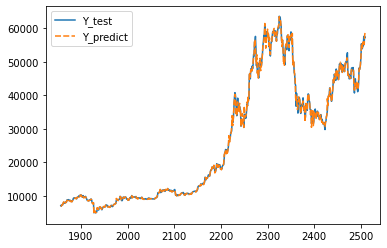

In [27]:
import seaborn as sns
sns.lineplot(data = ouput)